# geoML package example

In this example we will see how to train a Gaussian Process model on the Walker Lake data.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import geoml

## Importing and preparing data

In [2]:
walker, walker_ex = geoml.data.Examples.walker()
walker
walker_ex

Object of class Grid2D with 78000 data locations

Data preview:

     U    V
0  0.0  0.0
1  0.0  0.0
2  0.0  0.0
3  0.0  0.0
4  0.0  0.0

## Training the model

Here we define the model's characteristics and do the training. For the covariance we chose two spherical structures. For the warping we scale the values, use the softplus function to keep the output positive and specify a monotonic spline for additional flexibility.

In [3]:
gp = geoml.models.GP(
    sp_data = walker, 
    variable = "V", 
    kernels = [
         # Each kernel object must specify a transform object to scale the data.
         # In this case we choose an isotropic transform. The number specified is the range,
         # but it will change after training.
         geoml.kernels.SphericalKernel(geoml.transform.Isotropic(5)),
         geoml.kernels.SphericalKernel(geoml.transform.Isotropic(10))],
    warping = [
         geoml.warping.Scaling(positive = True), 
         geoml.warping.Softplus(), 
         geoml.warping.Spline(5)])
print(gp.log_lik())
gp.train(max_iter = 2500, seed = 1234)

-5018.771052707607
Initializing population..................................................

Iteration: 2500 | Best fitness: -3092.5002678010846 | No improvement for 363/500.0 iterations        

These are the parameters the model learned:

In [4]:
print(gp)

A GP object

Covariance model: A CovarianceModelRegression object

Variance is free

Nugget: 0.014561174118624549

Position 0: SphericalKernel
	Variance: 0.20109097702632914
	Parameters:
		range: [202.35594926] (free)

Position 1: SphericalKernel
	Variance: 0.7843478488550464
	Parameters:
		range: [984.11251008] (free)

Warping:

Position 0: Scaling

Position 1: Softplus

Position 2: Spline
	Parameters:
		warp: [-0.3094  0.1728  0.1063  0.3242  0.9819] (free)
		original: [-3.   1.5  1.5  1.5  1.5] (fixed)



## Prediction and results

The `walker_ex` object already has coordinates defined on a grid, so we use it to make the prediction.

In [5]:
gp.predict(walker_ex, name="Vpred")
walker_ex

Processing batch 4 of 4       



Object of class Grid2D with 78000 data locations

Data preview:

     U    V  Vpred_mean      ...       Vpred_p0.5  Vpred_p0.75  Vpred_p0.975
0  0.0  0.0   -0.264492      ...         1.466925    83.046203    611.857548
1  0.0  0.0   -0.262711      ...         1.488655    82.172595    603.860028
2  0.0  0.0   -0.260670      ...         1.514184    81.525679    596.340147
3  0.0  0.0   -0.258325      ...         1.544370    81.155757    589.435067
4  0.0  0.0   -0.255624      ...         1.580319    81.125350    583.317758

[5 rows x 9 columns]

We use the matplotlib library to visualize the results.

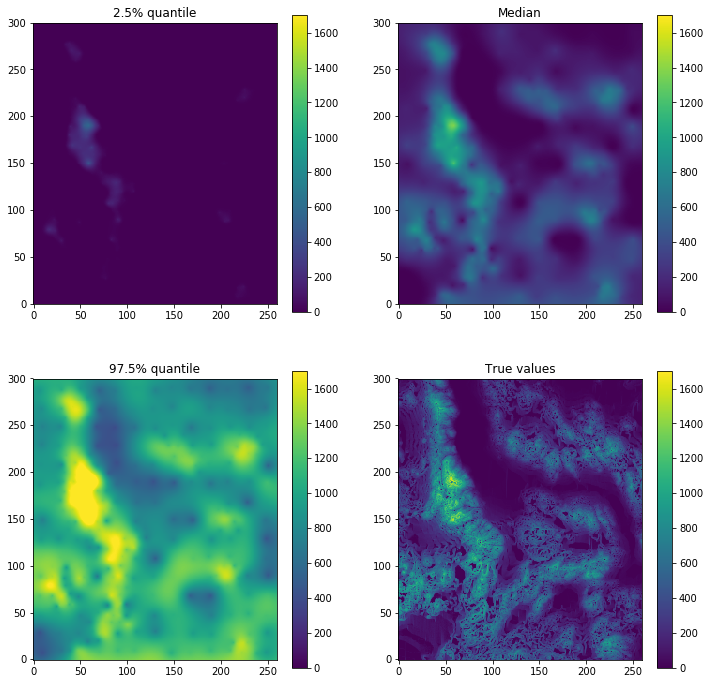

In [6]:
plt.figure(figsize=(12,12))
plt.subplot(2, 2, 1)
plt.imshow(walker_ex.as_image("Vpred_p0.025"), vmin=0, vmax=1700, origin="lower")
plt.colorbar()
plt.title("2.5% quantile")
plt.subplot(2, 2, 2)
plt.imshow(walker_ex.as_image("Vpred_p0.5"), vmin=0, vmax=1700, origin="lower")
plt.colorbar()
plt.title("Median")
plt.subplot(2, 2, 3)
plt.imshow(walker_ex.as_image("Vpred_p0.975"), vmin=0, vmax=1700, origin="lower")
plt.colorbar()
plt.title("97.5% quantile")
plt.subplot(2, 2, 4)
plt.imshow(walker_ex.as_image("V"), vmin=0, vmax=1700, origin="lower")
plt.colorbar()
plt.title("True values")
plt.show()